# Second Level EDA

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import log_loss


In [16]:
data=pd.read_csv(r'C:\Users\asus\Documents\Projects\Question_Similarity_Pairs\Input\preprocessed_data.csv')
data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,217099,323388,323389,store fingerprint browser,store browser fingerprint,0
1,296706,268935,73790,peopl like dog,peopl like dog,1
2,237109,226912,348198,peopl choos children despit world live,worthwhil bring children world given statist r...,0
3,111142,182115,182116,advantag disadvantag ofupgrad credit card,disadvantag credit card,0
4,222983,330686,330687,minor hewil angel,activ hewil angel montral,0


In [17]:
data.shape

(59999, 6)

Let's try to compute our accuracy on this pre-processed data

In [18]:
data.dropna(axis=0,subset=['question1','question2'],how='any',inplace=True)


In [19]:
cv=CountVectorizer(max_features=30)
q1_list=data['question1'].tolist()
q2_list=data['question2'].tolist()
tot_list=q1_list+q2_list
len(tot_list)

119968

In [20]:

q1,q2=np.vsplit(cv.fit_transform(tot_list).toarray(),2)
q1_df=pd.DataFrame(q1,index=data.index)
q2_df=pd.DataFrame(q2,index=data.index)
final_df=pd.concat([q1_df,q2_df],axis=1)
final_df.shape



(59984, 60)

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(final_df,data['is_duplicate'],test_size=0.2,stratify=data['is_duplicate'],random_state=24)

In [22]:
model=LogisticRegression()
model.fit(X_train,Y_train)



LogisticRegression()

In [23]:
train_score=log_loss(Y_train,model.predict_proba(X_train))
test_score=log_loss(Y_test,model.predict_proba(X_test))
print("Train loss=",train_score)
print("Test loss=",test_score)

Train loss= 0.6379970712567864
Test loss= 0.6373479535043619


In [24]:
rf_model=RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train,Y_train)



RandomForestClassifier(n_estimators=20)

In [25]:
train_score=log_loss(Y_train,rf_model.predict_proba(X_train))
test_score=log_loss(Y_test,rf_model.predict_proba(X_test))
print("Train Loss=",train_score)
print("Test Loss=",test_score)

Train Loss= 0.5405732153870738
Test Loss= 0.7918918957274801


### Observation
* We observe that we've removed the issue of overfitting here by using some basic pre-processing
* However the accuracy is still poor and we need to improve it using some form of feature engineering
* By using ensemble technique we're able to get a better result

### Now let's do some basic level of featurization

<h5> The basic features are as below:</h5>

* <b>len_ques1:</b> Total characters in question 1
* <b>len_ques2:</b> Total characters in question 2
* <b>q1_wordcount:</b> Count of words in question 1
* <b>q2_wordcount:</b> Count of words in question 2
* <b>word_share:</b> Common words between question 1 and question 2



In [26]:
#Creating len_ques1 and len_ques2
data['len_ques1']=data['question1'].apply(len)
data['len_ques2']=data['question2'].apply(len)

In [27]:
#Creating q1_wordcount and q2_wordcount
data['q1_wordcount']=data['question1'].apply(lambda x:len(x.split(' ')))
data['q2_wordcount']=data['question2'].apply(lambda x:len(x.split(' ')))

In [28]:
#Creating word_share 
def common_word(x,y):
    lst=[i for i in x.split(' ') if i in y.split(' ')]
    return len(lst)
data['word_share']=data[['question1','question2']].apply(lambda x:common_word(*x),axis=1)


In [29]:
data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,len_ques1,len_ques2,q1_wordcount,q2_wordcount,word_share
0,217099,323388,323389,store fingerprint browser,store browser fingerprint,0,25,25,3,3,3
1,296706,268935,73790,peopl like dog,peopl like dog,1,14,14,3,3,3
2,237109,226912,348198,peopl choos children despit world live,worthwhil bring children world given statist r...,0,38,102,6,15,3
3,111142,182115,182116,advantag disadvantag ofupgrad credit card,disadvantag credit card,0,41,23,5,3,3
4,222983,330686,330687,minor hewil angel,activ hewil angel montral,0,17,25,3,4,2


### Plotting PDFs for basic features

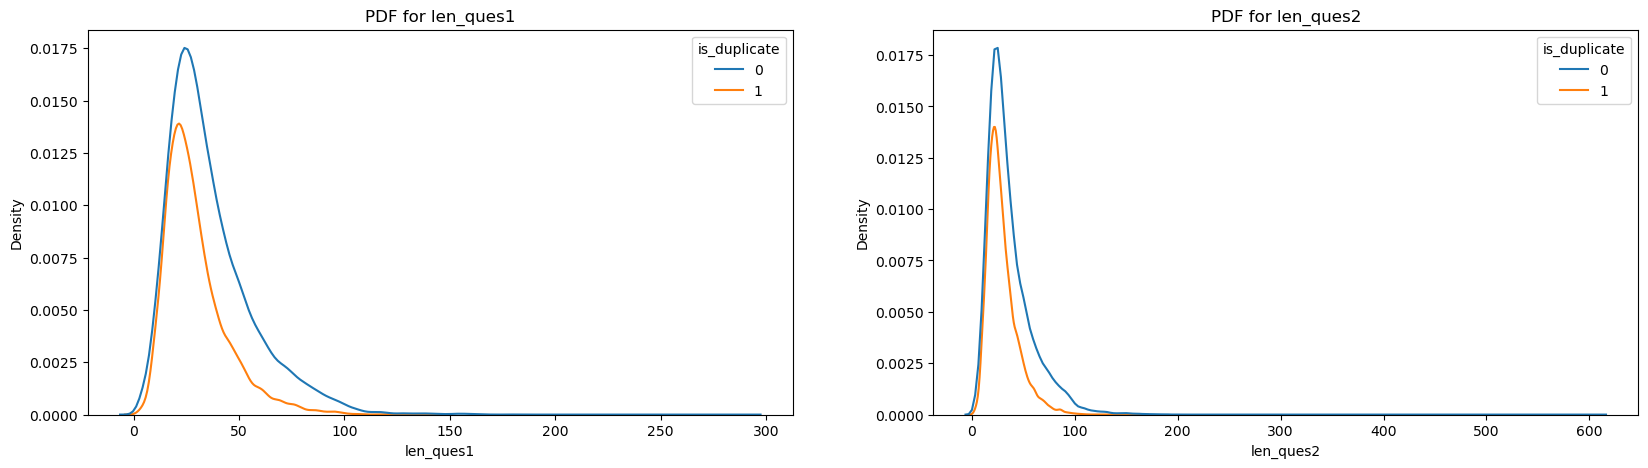

In [30]:
#Pdf for len_ques1 and len_ques2
fig,ax=plt.subplots(1,2,figsize=(20,5))
ax[0].title.set_text('PDF for len_ques1')
ax[1].title.set_text('PDF for len_ques2')
sns.kdeplot(data,x='len_ques1',hue='is_duplicate',ax=ax[0])
sns.kdeplot(data,x='len_ques2',hue='is_duplicate',ax=ax[1])
plt.show()


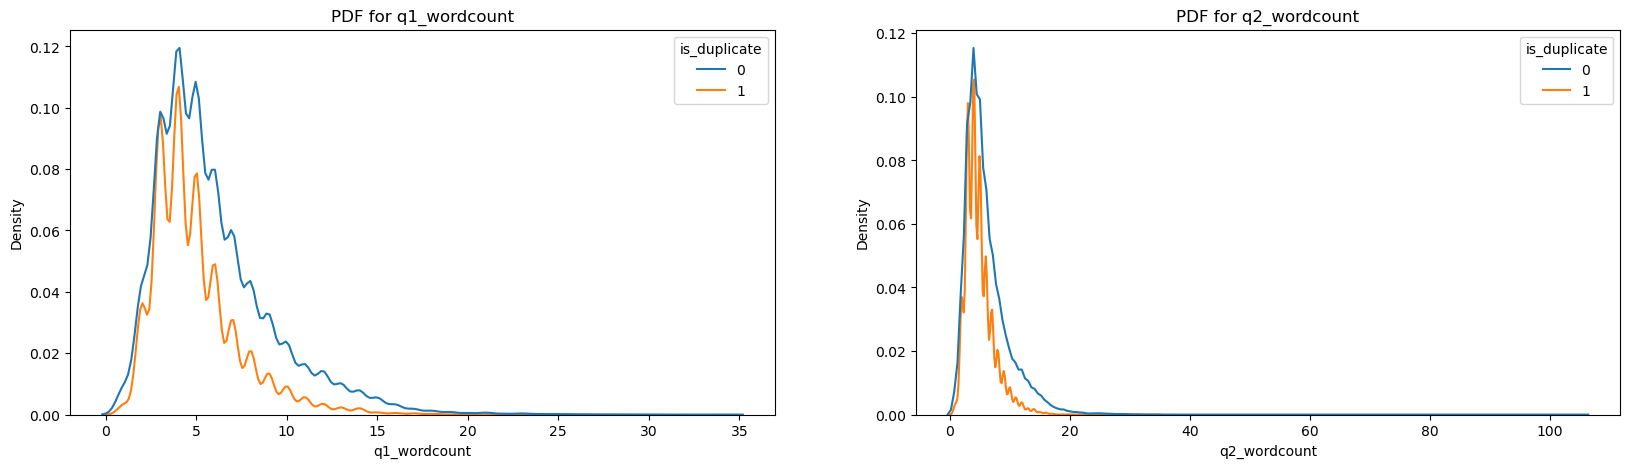

In [31]:
#PDF for q1_wordcount and q2_wordcount
fig,ax=plt.subplots(1,2,figsize=(20,5))
ax[0].title.set_text('PDF for q1_wordcount')
ax[1].title.set_text('PDF for q2_wordcount')
sns.kdeplot(data,x='q1_wordcount',hue='is_duplicate',ax=ax[0])
sns.kdeplot(data,x='q2_wordcount',hue='is_duplicate',ax=ax[1])
plt.show()


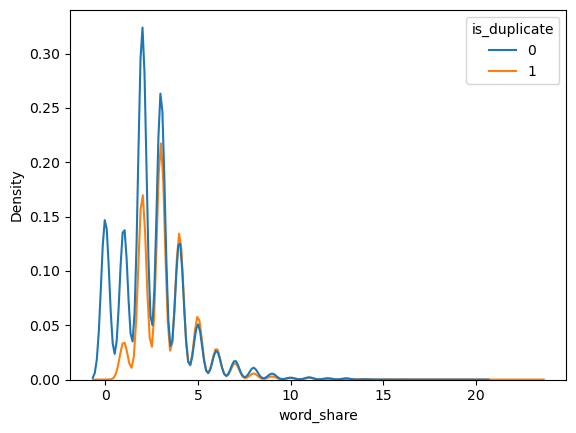

In [32]:
#PDF for wordshare
sns.kdeplot(data,x='word_share',hue='is_duplicate')
plt.show()

In [33]:
ques_list=list(data['question1'])+list(data['question2'])
q1,q2=np.vsplit(cv.fit_transform(ques_list).toarray(),2)
ques_1=pd.DataFrame(q1,index=data.index)
ques_2=pd.DataFrame(q2,index=data.index)
tot_list=pd.concat([ques_1,ques_2],axis=1)
tot_list.shape

(59984, 60)

In [34]:
temp_df=data[['is_duplicate','len_ques1','len_ques2','q1_wordcount','q2_wordcount','word_share']]
fin_df=pd.concat([temp_df,tot_list],axis=1)
fin_df.shape

(59984, 66)

In [35]:
X,Y=fin_df.drop('is_duplicate',axis=1),fin_df['is_duplicate']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)


In [36]:
import warnings
warnings.filterwarnings('ignore')
lr=LogisticRegression()
lr.fit(X_train,Y_train)
#Calcuate train accuracy
print("Train loss ",log_loss(Y_train,lr.predict_proba(X_train)))
#Calculate test accuracy
print("Test loss ",log_loss(Y_test,lr.predict_proba(X_test)))


Train loss  0.5415169422115932
Test loss  0.5457346174628119


In [38]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
#Calculate train accuracy
print("Train Loss: ",log_loss(Y_train,rf.predict_proba(X_train)))
#Calculate test accuracy
print("Test Loss: ",log_loss(Y_test,rf.predict_proba(X_test)))

Train Loss:  0.19838539874916478
Test Loss:  0.6468902841650297


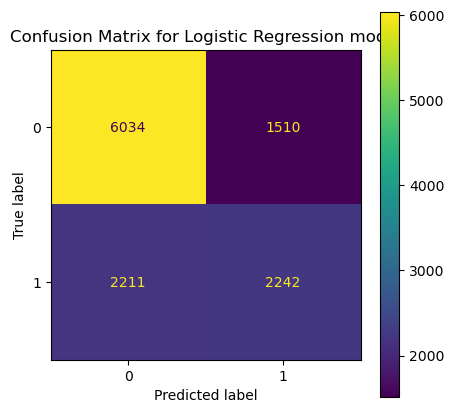

In [ ]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
fig,ax=plt.subplots(figsize=(5,5))
plot_confusion_matrix(lr,X_test,Y_test,ax=ax)
ax.set_title("Confusion Matrix for Logistic Regression model")
plt.show()

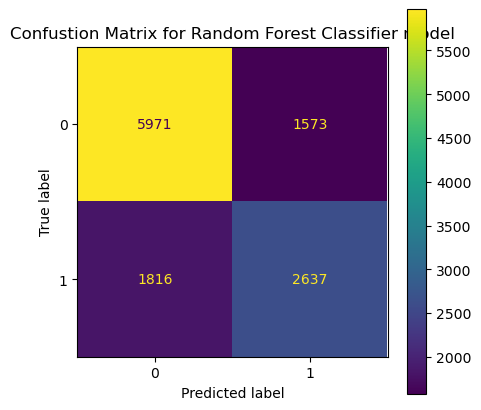

In [ ]:
fig,ax=plt.subplots(figsize=(5,5))
plot_confusion_matrix(rf,X_test,Y_test,ax=ax)
plt.title("Confustion Matrix for Random Forest Classifier model")
plt.show()

##### Observations:
* Since as per this problem statement <b>False Positive</b> is a critical category that we want to avoid and as per the above graph Random Forest Classifier model is the one which is giving lesser number of <b>False Positives</b>
* But we can see that there's a slight of overfitting 

* Let's add more advanced feature to this data

### Dumping in the processed data with basic features

In [ ]:
data.to_csv(r"C:\Users\asus\Documents\Projects\Question_Similarity_Pairs\Input\basic_feature.csv",index=False)